# CHAPTER 23: Variance-Reduced Methods II: Random Reshuffling

### This code runs simulations for Example 1 and generates figure 2 from Chapter 23: Variance-Reduced Methods II: Random Reshuffling (vol I) (vol I)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Semanur Avşar 

Required Libraries:

1. numpy
2. matplotlib

Required Functions:

1. generate_logistic
2. logistic_minimizer

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from generate_logistic import generate_logistic
from logistic_minimizer import logistic_minimizer

## Example 23.1 (Comparing performance of algorithms)

We illustrate the convergence performance of SAGA, SVRG, and AVRG on simulated data. We consider the same regularized logistic empirical risk problem from ($22.60$), namely, 

$$
\min_{w \in \mathbb{R}^{M}} \quad \left\{ P(w) \triangleq \rho\|w\|^2 + \frac{1}{N}\sum_{m=0}^{N-1} \ln\left(1+e^{-\gamma(m) h_m^\top w}\right) \right\} \tag{23.43}
$$

where $h_m\!\in\! \mathbb{R}^M\!$ and  $\gamma(m)\!\!\in\!\! \{\pm1\}$. In all  experiments, we set $\rho=0.5$ and $M=25$. We run two sets of simulations: one involving $N=500$ samples and another involving $N=2000$ samples. Since the convergence rates under random reshuffling are on the order of $\lambda=1-\mu\nu N/4$, we keep the value of the product $\mu N$ constant at $\mu=0.5$. This corresponds to simulating with the step sizes $\mu=0.001$ in one case and $\mu=0.00025$ in the other case. We generate $N$ random data pairs $\{\gamma(m),h_m\}$ according to a logistic model. First, a random parameter model $w^a\in \mathbb{R}^{M}$ is selected, and a random collection of  vectors $\{h_m\}$ are generated with zero-mean unit-variance Gaussian entries. Then, for each $h_m$, the label $\gamma(m)$ is set to either $+1$ or $-1$ according to the following construction:

$$
\gamma(m)=+1 \; \textnormal{if} \; \Bigl(\dfrac{1}{1+e^{-h_m^T w^a}}\Bigr) \geq 0.5 \; \textnormal{otherwise} \;  \gamma(m)=-1 \tag{23.44}
$$

A total of $K=30$ epochs are run over the data. Figure $23.2$ compares the learning curves for SAGA, SVRG, and AVRG under uniform sampling and random reshuffling in normalized logarithmic scale; all normalized curves start at the value 1 and they are obtained by averaging over the $K=30$ epochs. 

wait....generating data
wait....processing data
wait....generating data
wait....processing data


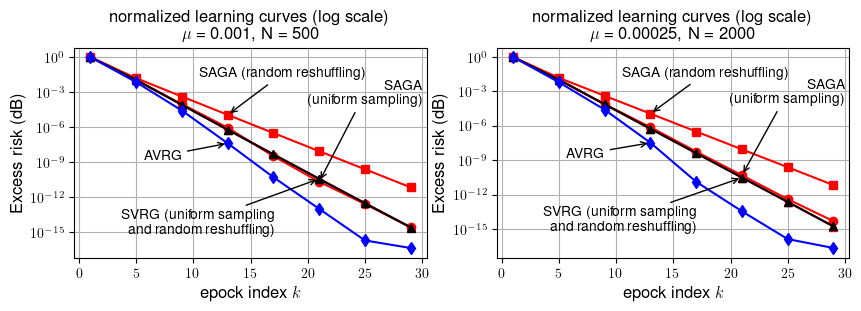

step-sizes used
[0.001, 0.00025]


In [3]:
# l2-regularized empirical logistic risk
# P(w) = rho\|w\|^2 + (1/N)sum_{n=0}^{N-1} ln(1+exp(-gamma(m) h_m' w))

rho = 0.5   # regularization parameter
M = 25   # feature size
N = 500  # number of data points
K = 30   # number of epochs

L = 2 # run two simulatins with different number of points
Nsize = np.array([500, 2000])

# Create a figure
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
       
fig = plt.figure(figsize=(10,6))

for ell in range(L):
    print('wait....generating data')
    N = Nsize[ell]
    mu = 0.5 / N

    # Generate data
    zo = np.random.rand(M).reshape(-1,1) # underlying parameter model for logistic data
    p, gamma_vec, H = generate_logistic(N, zo, 0)  # logistic model with zero offset
    ws, Ps, thetas = logistic_minimizer(rho, gamma_vec, H, 0) # ignore offset

    w = np.random.randn(M) # initial condition for SAGA weight iterate
    wsaga_us = w.copy() # initial condition for SAGA under uniform sampling
    wsvrg_us = w.copy() # initial condition for SVRG under uniform sampling
    wsaga_rf = w.copy() # initial condition for SAGA under random reshuffling
    wsvrg_rf = w.copy() # initial condition for SVRG under random reshuffling
    wavrg = w.copy() # initial condition for AVRG, which uses random reshuffling

    Phi_us = np.zeros((M, N)) # memory variables for SAGA under uniform sampling
    Phi_rf = Phi_us.copy() # memory for SAGA under random reshuffling

    bsaga_us = 0
    for m in range(N):
        h_m = H[:, m]
        gamma_m = gamma_vec[m]
        a = 1 + np.exp(gamma_m * np.dot(h_m, Phi_us[:, m - 1].reshape(-1,1)))
        s = 2 * rho * Phi_us[:, m - 1] - gamma_m * h_m / a # adding gradients of logistic loss
        bsaga_us = bsaga_us + s
    bsaga_us = bsaga_us / N # initialization of vector b for SAGA with uniform sampling
    bsaga_rf = bsaga_us.copy() # initialization of vector b for SAGA with random reshuffling

    Psaga_us = np.zeros(K) # learning curve for SAGA under uniform sampling
    Psvrg_us = np.zeros(K) # learning curve for SVRG under uniform sampling
    Psaga_rf = np.zeros(K) # learning curve for SAGA under random reshuffling
    Psvrg_rf = np.zeros(K) # learning curve for SVRG under random reshuffling
    Pavrg = np.zeros(K)# learning curve for AVRG, which uses random reshuffling

    print('wait....processing data')

    for k in range(K): # iterating over runs
        #print(k)  # epoch index

        phi_avrg = wavrg.copy() # initialization for AVRG
        if k == 0:
            bavrg = 0
        else:
            bavrg = bavrg_next
        bavrg_next = np.zeros(M)

        phi_svrg_us = wsvrg_us.copy() # initializing b vector for SVRG under uniform sampling
        bsvrg_us = 0
        for m in range(N):
            h_m = H[:, m]
            gamma_m = gamma_vec[m]
            asvrg = 1 + np.exp(gamma_m * np.dot(h_m, wsvrg_us.reshape(-1,1)))
            ss = 2 * rho * wsvrg_us - gamma_m * h_m / asvrg # adding gradients of logistic loss
            bsvrg_us = bsvrg_us + ss
        bsvrg_us = bsvrg_us / N #initialization of vector b for SVRG under uniform sampling

        phi_svrg_rf = wsvrg_rf # initializing b vector for SVRG under random reshuffling
        bsvrg_rf = 0
        for m in range(N):
            h_m = H[:, m]
            gamma_m = gamma_vec[m ]
            asvrg = 1 + np.exp(gamma_m * np.dot(h_m, wsvrg_rf.reshape(-1,1)))
            ss = 2 * rho * wsvrg_rf - gamma_m * h_m / asvrg # adding gradients of logistic loss
            bsvrg_rf = bsvrg_rf + ss
        bsvrg_rf = bsvrg_rf / N

        for m in range(N): # evaluating empirical risk function at start of each epoc
            h_m = H[:, m] # feature vector
            gamma_m = gamma_vec[m]
            a = 1 + np.exp(-gamma_m * np.dot(h_m, wsaga_us.reshape(-1,1)))
            Psaga_us[k] = Psaga_us[k] + np.log(a) # SAGA under uniform sampling
            a = 1 + np.exp(-gamma_m * np.dot(h_m, wsaga_rf.reshape(-1,1)))
            Psaga_rf[k] = Psaga_rf[k] + np.log(a) # SAGA under random reshuffling
            asvrg = 1 + np.exp(-gamma_m * np.dot(h_m, wsvrg_us.reshape(-1,1))) # SVRG under uniform sampling
            Psvrg_us[k] = Psvrg_us[k] + np.log(asvrg) 
            asvrg = 1 + np.exp(-gamma_m * np.dot(h_m, wsvrg_rf.reshape(-1,1))) # SVRG under random reshuffling
            Psvrg_rf[k] = Psvrg_rf[k] + np.log(asvrg)
            aavrg = 1 + np.exp(-gamma_m * np.dot(h_m, wavrg.reshape(-1,1))) # AVRG
            Pavrg[k] = Pavrg[k] + np.log(aavrg)

        Psaga_us[k] = (1 / N) * Psaga_us[k] # SAGA uniform sampling
        Psaga_us[k] = Psaga_us[k] + rho * np.linalg.norm(wsaga_us, 2) ** 2 # risk value at start of epoch k

        Psaga_rf[k] = (1 / N) * Psaga_rf[k] # SAGA random reshuffling
        Psaga_rf[k] = Psaga_rf[k] + rho * np.linalg.norm(wsaga_rf, 2) ** 2 # risk value at start of epoch k

        Psvrg_us[k] = (1 / N) * Psvrg_us[k] # SVRG uniform sampling
        Psvrg_us[k] = Psvrg_us[k] + rho * np.linalg.norm(wsvrg_us, 2) ** 2

        Psvrg_rf[k] = (1 / N) * Psvrg_rf[k] # SVRG random reshuffling
        Psvrg_rf[k] = Psvrg_rf[k] + rho * np.linalg.norm(wsvrg_rf, 2) ** 2

        Pavrg[k] = (1 / N) * Pavrg[k] # AVRG, uses random reshuffling
        Pavrg[k] = Pavrg[k] + rho * np.linalg.norm(wavrg, 2) ** 2

        Urr = np.random.permutation(N) # random reshuffling permutation

        for n in range(N): # iterating over data in each epoch 
            u = np.random.randint(N) # uniform sampling
            h_u = H[:, u] # feature vector
            gamma_u = gamma_vec[u] # label
            
            ## SAGA under uniform sampling
            phi_u = Phi_us[:, u] # memory variable
            aphi = 1 + np.exp(gamma_u * np.dot(h_u, phi_u.reshape(-1,1)))
            sphi = 2 * rho * phi_u - gamma_u * h_u / aphi # gradient at phi

            aw = 1 + np.exp(gamma_u * np.dot(h_u, wsaga_us.reshape(-1,1)))
            sw = 2 * rho * wsaga_us - gamma_u * h_u / aw # gradient at w
            
            wsaga_us = wsaga_us - mu * (sw - sphi + bsaga_us) # updated w (SAGA)
            Phi_us[:, u] = wsaga_us

            aupdated = 1 + np.exp(gamma_u * np.dot(h_u, wsaga_us.reshape(-1,1)))
            supdated = 2 * rho * wsaga_us - gamma_u * h_u / aupdated # gradient at phi
            
            bsaga_us = bsaga_us + (1 / N) * (supdated - sphi)

            ## SVRG under uniform sampling
            aphi_svrg = 1 + np.exp(gamma_u * np.dot(h_u, phi_svrg_us.reshape(-1,1)))
            sphi_svrg = 2 * rho * phi_svrg_us - gamma_u * h_u / aphi_svrg  # gradient at phi

            aw_svrg = 1 + np.exp(gamma_u * np.dot(h_u, wsvrg_us.reshape(-1,1)))
            sw_svrg = 2 * rho * wsvrg_us - gamma_u * h_u / aw_svrg # gradient at w
            
            wsvrg_us = wsvrg_us - mu * (sw_svrg - sphi_svrg + bsvrg_us) # updated w (SVRG)

            ## SAGA under random reshuffling
            phi_u = Phi_rf[:, Urr[n]] # memory variable
            gamma_u = gamma_vec[Urr[n]]
            h_u = H[:, Urr[n]]
            aphi = 1 + np.exp(gamma_u * np.dot(h_u, phi_u.reshape(-1,1)))
            sphi = 2 * rho * phi_u - gamma_u * h_u / aphi # gradient at phi

            aw = 1 + np.exp(gamma_u * np.dot(h_u, wsaga_rf.reshape(-1,1)))
            sw = 2 * rho * wsaga_rf - gamma_u * h_u / aw # gradient at w
            
            wsaga_rf = wsaga_rf - mu * (sw - sphi + bsaga_rf) # updated w (SAGA)
            Phi_rf[:, Urr[n]] = wsaga_rf

            aupdated = 1 + np.exp(gamma_u * np.dot(h_u, wsaga_rf.reshape(-1,1)))
            supdated = 2 * rho * wsaga_rf - gamma_u * h_u / aupdated # gradient at phi
            
            bsaga_rf = bsaga_rf + (1 / N) * (supdated - sphi)

            ## SVRG under random reshuffling
            gamma_u = gamma_vec[Urr[n]]
            h_u = H[:, Urr[n]]

            aphi_svrg = 1 + np.exp(gamma_u * np.dot(h_u, phi_svrg_rf.reshape(-1,1)))
            sphi_svrg = 2 * rho * phi_svrg_rf - gamma_u * h_u / aphi_svrg

            aw_svrg = 1 + np.exp(gamma_u * np.dot(h_u, wsvrg_rf.reshape(-1,1)))
            sw_svrg = 2 * rho * wsvrg_rf - gamma_u * h_u / aw_svrg
            wsvrg_rf = wsvrg_rf - mu * (sw_svrg - sphi_svrg + bsvrg_rf)
            
            ## AVRG (uses random reshuffling)
            gamma_rr = gamma_vec[Urr[n]]
            h_rr = H[:, Urr[n]]

            aphi_avrg = 1 + np.exp(gamma_rr * np.dot(h_rr, phi_avrg.reshape(-1,1)))
            sphi_avrg = 2 * rho * phi_avrg - gamma_rr * h_rr / aphi_avrg

            aw_avrg = 1 + np.exp(gamma_rr * np.dot(h_rr, wavrg.reshape(-1,1)))
            sw_avrg = 2 * rho * wavrg - gamma_rr * h_rr / aw_avrg
            wavrg = wavrg - mu * (sw_avrg - sphi_avrg + bavrg)
            bavrg_next = bavrg_next + (1 / N) * sw_avrg
            

    ax = fig.add_subplot(2, 2, ell + 1)
    ax.semilogy(
        range(1, K + 1, 4),
        np.abs(Psaga_us[0::4] - Ps).reshape(-1,1) / np.max(Psaga_us - Ps),
        '-or',
        range(1, K + 1, 4),
        np.abs(Psaga_rf[0::4] - Ps).reshape(-1,1) / np.max(Psaga_rf - Ps),
        '-sr',
        range(1, K + 1, 4),
        np.abs(Psvrg_us[0::4] - Ps).reshape(-1,1) / np.max(Psvrg_us - Ps),
        '-^r',
        range(1, K + 1, 4),
        np.abs(Psvrg_rf[0::4] - Ps).reshape(-1,1) / np.max(Psvrg_rf - Ps),
        '-^k',
        range(1, K + 1, 4),
        np.abs(Pavrg[0::4] - Ps).reshape(-1,1) / np.max(Pavrg - Ps),
        '-db'
    ) # learning curves
    ax.set_xlabel('epock index $k$', fontsize=12)
    ax.set_ylabel('Excess risk (dB)', fontsize=12)
    ax.set_title('normalized learning curves (log scale)\n $\mu$ = '+str(mu)+ ', N = '+ str(N), fontsize=12)
    # ax.legend(
        #['SAGA uniform sampling', 'SAGA random reshuffling', 'SVRG uniform sampling', 'SVRG random reshuffling', 'AVRG'],
        #fontsize=10)
    ax.grid()
    ax.axis('tight')
    
    # Add annotations
    plt.annotate('SAGA (random reshuffling)', xy= (13, np.abs(Psaga_rf[12] - Ps) / np.max(Psaga_rf - Ps)), 
            xytext= (25, 10**(-2)), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), 
            fontweight='bold',ha='right', va='bottom')
    plt.annotate('SAGA \n(uniform sampling)', xy= (21, np.abs(Psaga_us[20] - Ps) / np.max(Psaga_us - Ps)), 
            xytext= (30, 10**(-4)/2), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), 
            fontweight='bold',ha='right', va='bottom')
    plt.annotate('AVRG', xy= (13, np.abs(Pavrg[12] - Ps) / np.max(Pavrg - Ps)), 
            xytext= (9, 10**(-9)), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), 
            fontweight='bold',ha='right', va='bottom')
    plt.annotate('SVRG (uniform sampling\nand random reshuffling)', xy= (21, np.abs(Psvrg_us[20] - Ps) / np.max(Psvrg_us - Ps)), 
            xytext= (17, 10**(-13)), arrowprops=dict(arrowstyle="->", connectionstyle="arc3"), 
            fontweight='bold',ha='right', va='top')
    
plt.show()

print('step-sizes used')
mu_vec = [0.5 / Nsize[0], 0.5 / Nsize[1]]
print(mu_vec)

**Figure 23.2** (*Left*) Learning curves for $\mu=0.001$ and $N=500$ data points. (*Right*) Learning curves for $\mu=0.00025$ and $N=2000$ data points.